In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virat-kholi-testodit20-stat/final (1).csv


In [2]:
df=pd.read_csv("/kaggle/input/virat-kholi-testodit20-stat/final (1).csv")
df.head()

,index,runs,opponent,ground,date,match,Match_No,total
0,0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159


In [3]:
df.isna().sum()

index       0
runs        0
opponent    0
ground      0
date        0
match       0
Match_No    0
total       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     516 non-null    int64 
 1   runs      516 non-null    int64 
 2   opponent  516 non-null    object
 3   ground    516 non-null    object
 4   date      516 non-null    object
 5   match     516 non-null    object
 6   Match_No  516 non-null    int64 
 7   total     516 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 32.4+ KB


In [5]:
df.describe()

,index,runs,Match_No,total
count,516.000000,516.000000,516.000000,516.000000
mean,270.118217,45.947674,258.500000,11681.726744
std,155.219618,44.584372,149.100637,7301.114849
min,0.000000,0.000000,1.000000,12.000000
25%,134.750000,11.000000,129.750000,5328.250000
50%,270.500000,32.500000,258.500000,10886.500000
75%,403.250000,70.250000,387.250000,18535.750000
max,539.000000,254.000000,516.000000,23709.000000


In [6]:
df.drop(labels='index',axis=1,inplace=True)

In [7]:
df

,runs,opponent,ground,date,match,Match_No,total
0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159
...,...,...,...,...,...,...,...
511,11,England,Birmingham,1Jul2022,Test,512,23661
512,20,England,Birmingham,1Jul2022,Test,513,23681
513,1,England,Birmingham,9Jul2022,T20,514,23682
514,11,England,Nottingham,10Jul2022,T20,515,23693


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df['ground'].value_counts()

ground
Mirpur               23
Kolkata              18
Ahmedabad            17
Sydney               17
Bengaluru            17
                     ..
Bristol               1
Brabourne             1
Providence            1
Roseau                1
Chester-le-Street     1
Name: count, Length: 73, dtype: int64

In [10]:
top_10_ground=df.sort_values(by='runs',ascending=False)['ground'].head(10)

In [11]:
top_10_ground

434                 Pune
349                Delhi
297             Wankhede
348               Nagpur
284               Indore
305    Hyderabad(Deccan)
275           NorthSound
103               Mirpur
219            Melbourne
293        Visakhapatnam
Name: ground, dtype: object

In [12]:
top_10_ground.index

Index([434, 349, 297, 348, 284, 305, 275, 103, 219, 293], dtype='int64')

In [13]:
top_10_ground.values

array(['Pune', 'Delhi', 'Wankhede', 'Nagpur', 'Indore',
       'Hyderabad(Deccan)', 'NorthSound', 'Mirpur', 'Melbourne',
       'Visakhapatnam'], dtype=object)

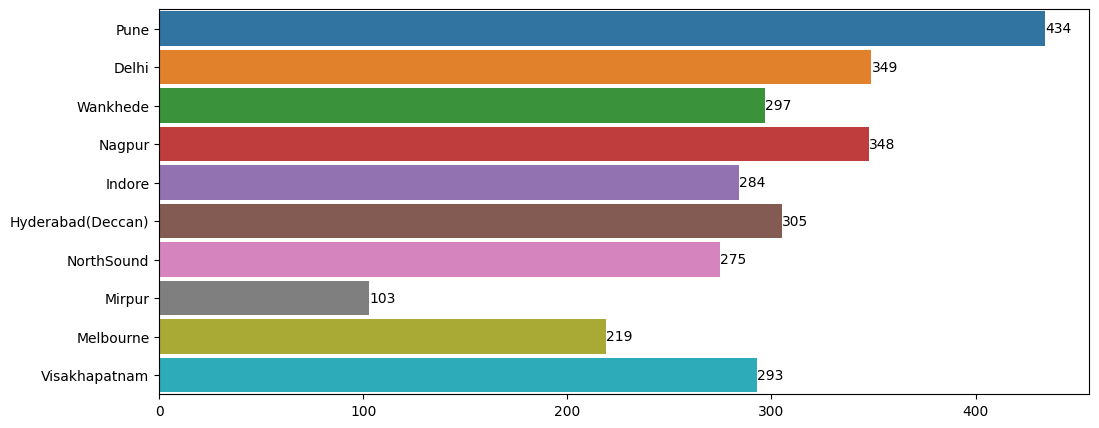

In [14]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=top_10_ground.index,y=top_10_ground.values,data=df,width=0.9)
for i in ax.containers:
    ax.bar_label(i)